# พลอตแผนที่ลมจากข้อมูล ERA5
* แบบฝึกหัดนี้นิสิตจะได้ฝึกหัด
    * การอ่านข้อมูล ERA5 เข้ามาใน XARRAY
    * การพลอตแผนที่ลมเดือนที่นิสิตสนใจในระดับ850hPa
    * การคำนวณและพลอตค่าเฉลี่ยลมเชิงภูมิอากาศของเดือนกรกฎาคม 1991-2020 ในระดับ850hPa

โค้ดดัดแปลงมาจากลิงก์ https://www.youtube.com/watch?v=1Nr9KW89lCc

* สูตรในการคำนวณ anomalies https://iridl.ldeo.columbia.edu/dochelp/QA/Basic/anomalies.html นั่นคือ anomaly = X -Climatological mean

## 1. อ่านไลบราลี

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy import feature as cf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = xr.open_dataset('era5_monthly_mean_globe.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 80)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-01-01 1981-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [325]:
# data = data.sel(level=850)  # ใช้แบบนี้หากมีข้อมูลหลาย level

# 2. เลือกช่วงเวลาและตัวแปรที่นิสิตสนใจ

In [326]:
data=data.sel(time='2011-07-01')

In [327]:
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2011-07-01
Data variables:
    z          (latitude, longitude) float32 ...
    r          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
    vo         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [328]:
x = data.longitude
y = data.latitude
u = data.u
v =data.v

In [329]:
x

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    time       datetime64[ns] 2011-07-01
Attributes:
    units:      degrees_east
    long_name:  longitude

In [330]:
y

<xarray.DataArray 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time      datetime64[ns] 2011-07-01
Attributes:
    units:      degrees_north
    long_name:  latitude

In [331]:
u

<xarray.DataArray 'u' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2011-07-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [332]:
v

<xarray.DataArray 'v' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2011-07-01
Attributes:
    units:          m s**-1
    long_name:      V component of wind
    standard_name:  northward_wind

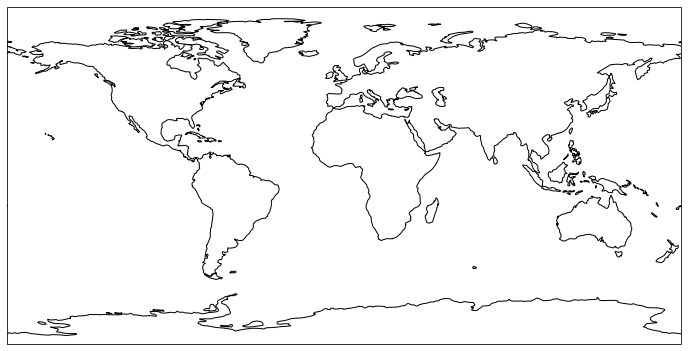

In [333]:
#ฝึกการพลอตแผนที่ด้วย cartopy+matplotlib
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

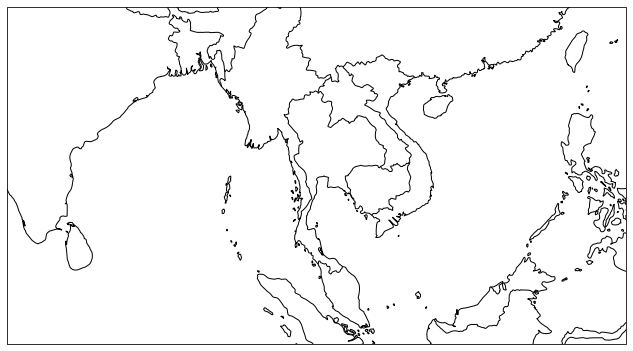

In [334]:
#ฝึกการพลอตแผนที่ด้วย cartopy+matplotlib ด้วยการเพิ่มขอบเขตประเทศและกำหนดขอบเขตแผนที่
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS) #เพิ่มขอบเขตประเทศ
ax.set_extent([75, 125, 0, 25]) # กำหนดขอบเขตแผนที่

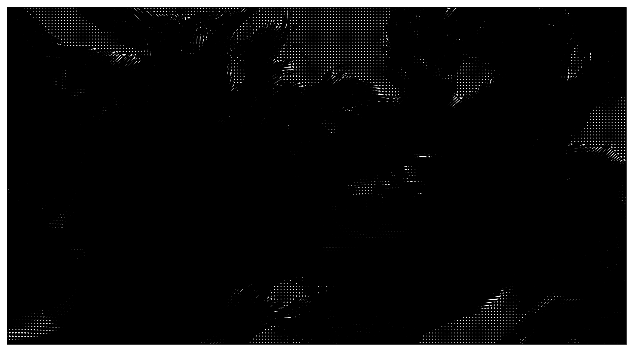

In [335]:
# พลอตลูกศรลม แต่เหมือนว่ามันหนาแน่นเกินไป เพราะความละเอียดข้อมูล ERA5 อยู่ที่ 0.25 deg 
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([75, 125, 0, 25])
ax.barbs(x, y, u, v)
plt.show()

แน่นเกินไป จำต้องลดการแสดงผล

In [336]:
x.shape

(1440,)

In [337]:
u.shape

(721, 1440)

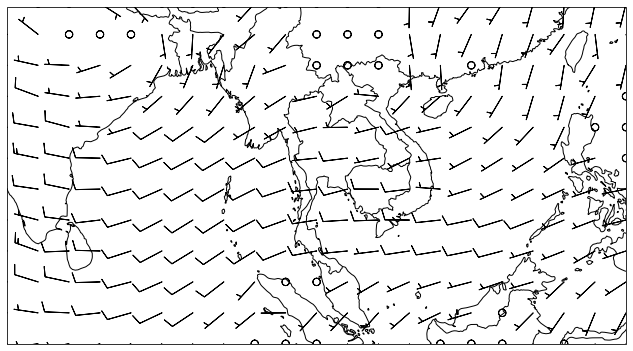

In [338]:
#ลดการแสดงผลลูกศรลม ให้พลอตทุกๆ 10 ช่องกริด
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([75, 125, 0, 25])
ax.barbs(x[::10], y[::10], u[::10,::10], v[::10,::10]) #ให้พลอตทุกๆ 10 ช่องกริด

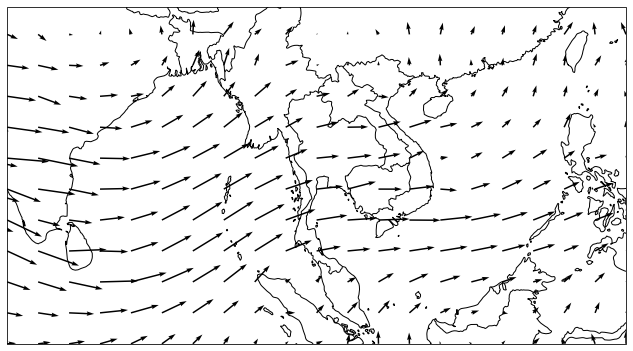

In [339]:
# พลอตเวกเตอร์ลม
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([75, 125, 0, 25])
ax.quiver(x[::10], y[::10], u[::10,::10], v[::10,::10], scale=200)

In [340]:
#คำนวณความเร็วลม wind speed
ws = np.sqrt(u**2+v**2)

In [341]:
ws.shape[0]

721

## 3 พลอตแผนที่เวกเตอร์ลมและความเร็วลมของปี 2011 เดือนกรกฎาคม 

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\li

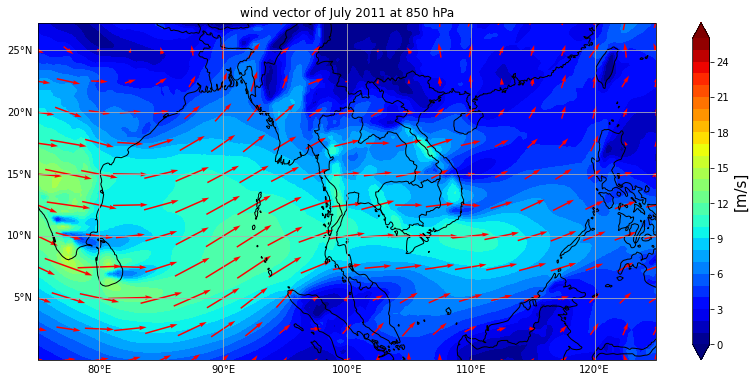

In [342]:

plt.figure(figsize=(13,6.2))

ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([75, 125, 0, 25])
ax.set_title('wind vector of July 2011 at 850 hPa' )


max_ = np.round((np.max(ws)))+2
min_ = np.round((np.min(ws)))
vstep = 1.0
levels = np.arange(min_, max_, vstep)
cwf = ax.contourf(lons, lats, ws, levels, cmap='jet',
                 extend='both', transform=datacrs)

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = ws.shape[0]/ws.shape[1]
cbar = plt.colorbar(cwf,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)

#wind vector
Q = ax.quiver(x[::10], y[::10], u[::10,::10], v[::10,::10],  scale=20,  color='red', pivot='mid', units='inches')

#scale wind vector 
#qk = ax.quiverkey(Q, 0.9, 0.9, 20, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False


# 4.พลอตลมเฉลี่ยเชิงภูมิอากาศวิทยา 30 ปี

### 4.1 อ่านข้อมูลเข้ามา

In [296]:
#อ่านข้อมูลเข้ามา
df = xr.open_dataset('era5_monthly_mean_globe.nc')

In [297]:
df

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 80)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1981-01-01 1981-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

### 4.2 เลือกช่วงเวลาและตัวแปรที่ต้องการ

In [298]:
df=df.sel(time=slice('1991-01', '2020-07'))

In [299]:
df

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 60)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1991-01-01 1991-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [300]:
# เลือกโดยใช้วิธีการ groups ใน xarray เอาเฉพาะเดือนมาก่อน เพื่อให้ได้ index เดือนมา
month_idxs=df.groupby('time.month').groups
# สกัดค่า index ของเดือนที่ต้องการ ในที่นี้ใช้ 7 แทนเดือนกรกฏาคม เนื่องจาก 1 คือเดือนมกราคม
jul_idxs=month_idxs[7]
# เมื่อได้ค่า index ของเดือนกรกฎาคม ให้นำมาใช้สกัดข้อมูลเดือนกรกฎาคมได้เลย
ds_jul=df.isel(time=jul_idxs)

In [301]:
ds_jul

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 30)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1991-07-01 1992-07-01 ... 2020-07-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-07 04:35:51 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [302]:
# เลือกตัวแปรที่ต้องการ
lons = ds_jul.longitude
lats = ds_jul.latitude
u = ds_jul.u
v = ds_jul.v

In [305]:
u

<xarray.DataArray 'u' (time: 30, latitude: 721, longitude: 1440)>
[31147200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1991-07-01 1992-07-01 ... 2020-07-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [303]:
lons

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    units:      degrees_east
    long_name:  longitude

### 4.3 คำนวณหาค่าเฉลี่ยของ U และ V

In [306]:
# หาค่า mean เนื่องจากตอนนี้ข้อมูลเป็นแบบ data array จึงต้องใช้คำสั่งใน numpy แต่ถ้าเป็น dataset จะใช้ของ xarray ได้เลย
u_mean = np.mean(u,axis=0)
v_mean = np.mean(v,axis=0)

In [308]:
u_mean; 

In [343]:
# คำนวณความเร็วลมเฉลี่ย 30 ปี
ws_mean = np.sqrt(u_mean**2+v_mean**2)

In [311]:
ws_mean.shape

(721, 1440)

### 4.4 พลอตแผนที่ลมเฉลี่ย 30 ที่ระดับ 850hPa

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Admin\anaconda3\envs\metpy\li

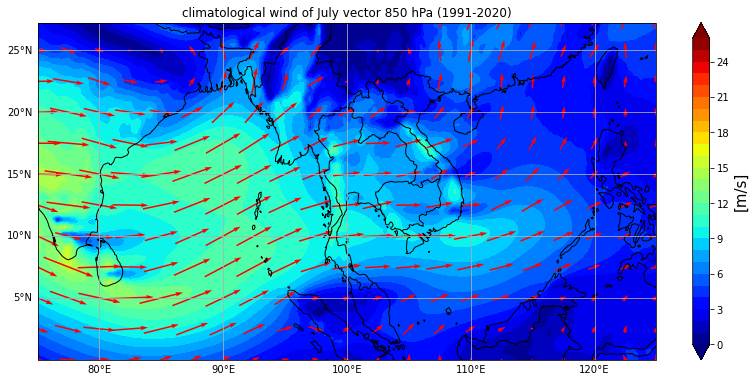

In [344]:
plt.figure(figsize=(13,6.2))

ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([75, 125, 0, 25])
ax.set_title('climatological wind of July vector 850 hPa (1991-2020)' )


max_ = np.round((np.max(ws_mean)))+2
min_ = np.round((np.min(ws_mean)))
vstep = 1.0
levels = np.arange(min_, max_, vstep)
cwf = ax.contourf(lons, lats, ws_mean, levels, cmap='jet',
                 extend='both', transform=datacrs)

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = ws_mean.shape[0]/ws_mean.shape[1]
cbar = plt.colorbar(cwf,fraction=0.047*im_ratio)
cbar.set_label('[m/s]', fontsize=15)

#wind vector
Q = ax.quiver(lons[::10], lats[::10], u_mean[::10,::10], v_mean[::10,::10],  scale=20,  color='red', pivot='mid', units='inches')

#scale wind vector 
#qk = ax.quiverkey(Q, 0.9, 0.9, 20, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

### แบบฝึกหัด
1. ให้นิสิตทำการหาลมเชิงภูมิอากาศวิทยาของเดือนมกราคม แสดงผลเช่นเดียวกันกับภาพด้านบน
2. ให้นิสิตอภิปรายความแตกต่างหรือความคล้ายคลึงระหว่างลมเชิงภูมิอากาศวิทยาของเดือนมกราคมกับเดือนกรกฎาคม
3. ให้นิสิตทำการเปรียบเทียบลมในระดับความกดบรรยากาศ 850 hPa ของเดือนที่นิสิตสนใจกับรูปแบบทางภูมิอากาศวิทยา พร้อมอภิปรายผลที่ได้